# Chapter 4 - Shallow Embeddings

In [1]:
import os
import sys

sys.path.append(f"{os.getcwd()}/..")

from utils import draw_graph

## Graph Factorization

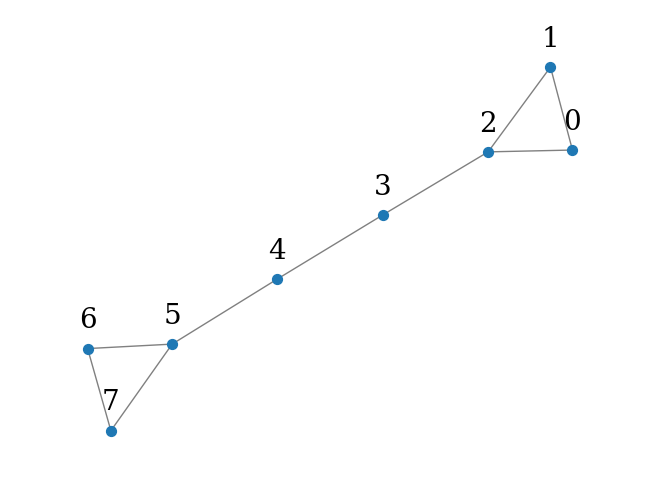

In [2]:
import networkx as nx

G = nx.barbell_graph(m1=3, m2=2)
draw_graph(G)

In [5]:
from pathlib import Path
(Path("gem") / "intermediate").mkdir(parents=True, exist_ok=True)

./gf not found. Reverting to Python implementation. Please compile gf, place node2vec in the path and grant executable permission


array([[-1.03077980e-03,  2.68426785e-03],
       [-1.03025945e-03,  2.68460448e-03],
       [-1.02760993e-03,  2.68534017e-03],
       [-1.03205430e-03,  2.67494168e-03],
       [-1.03178048e-03,  2.68544277e-03],
       [-1.12239241e-03,  2.83922108e-03],
       [-1.12715323e-03,  2.43305859e-03],
       [-3.63980215e-04,  2.62185261e-03],
       [-2.83050254e-05,  2.27283979e-03],
       [-3.30170855e-03,  7.36306655e-04],
       [-6.26812458e-04,  5.30977808e-04],
       [-1.61917602e-03,  5.30227981e-03],
       [-5.78304899e-03,  8.07947201e-03],
       [-6.23030032e-03,  3.57951159e-03],
       [-3.90898274e-03, -1.12185980e-03],
       [-3.90618929e-03, -1.12356134e-03],
       [-3.91752050e-03, -1.11604704e-03],
       [-3.88566530e-03, -1.13049236e-03],
       [-3.90606086e-03, -1.11985706e-03],
       [-4.01302483e-03, -9.72348151e-04],
       [-4.23035142e-03, -1.44549997e-03],
       [-2.30814232e-03, -1.27055933e-03],
       [-3.09483368e-03, -4.32427499e-04],
       [-7.

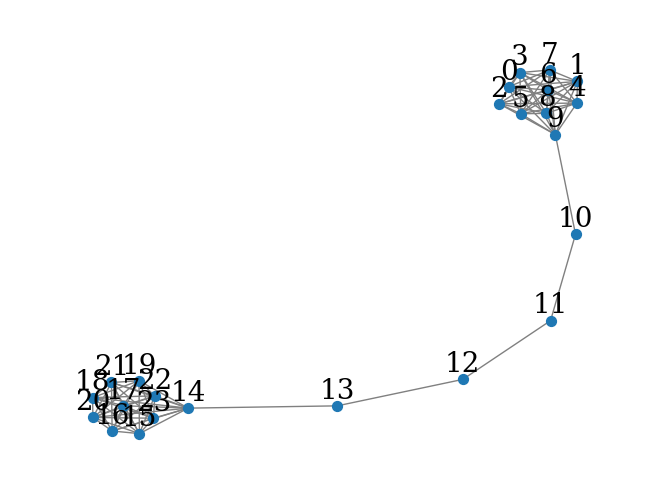

In [6]:
from gem.embedding.gf import GraphFactorization

G = nx.barbell_graph(m1=10, m2=4)
draw_graph(G)

gf = GraphFactorization(d=2,  data_set=None,max_iter=10000, eta=1*10**-4, regu=1.0)
gf.learn_embedding(G)

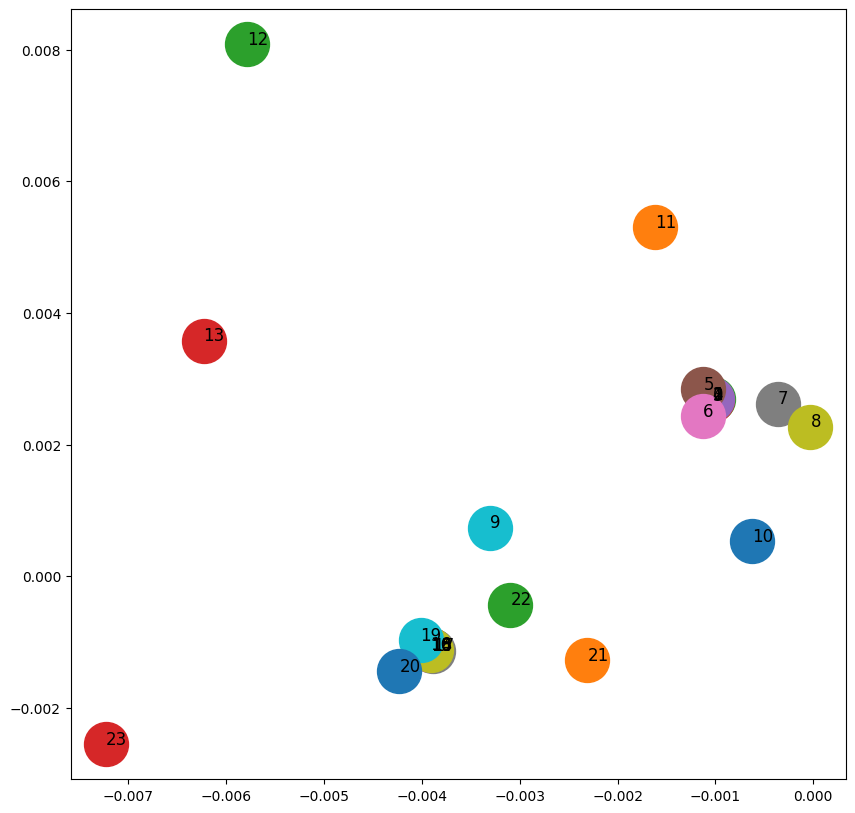

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.nodes():
    
    v = gf.get_embedding()[x]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=12)

## GraphRep

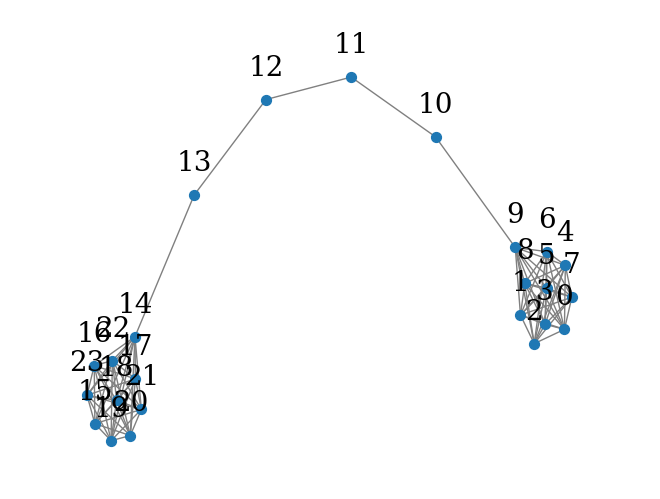

In [8]:
import networkx as nx
from karateclub.node_embedding.neighbourhood.grarep import GraRep

G = nx.barbell_graph(m1=10, m2=4)
draw_graph(G)

gr = GraRep(dimensions=2,order=3)
gr.fit(G)

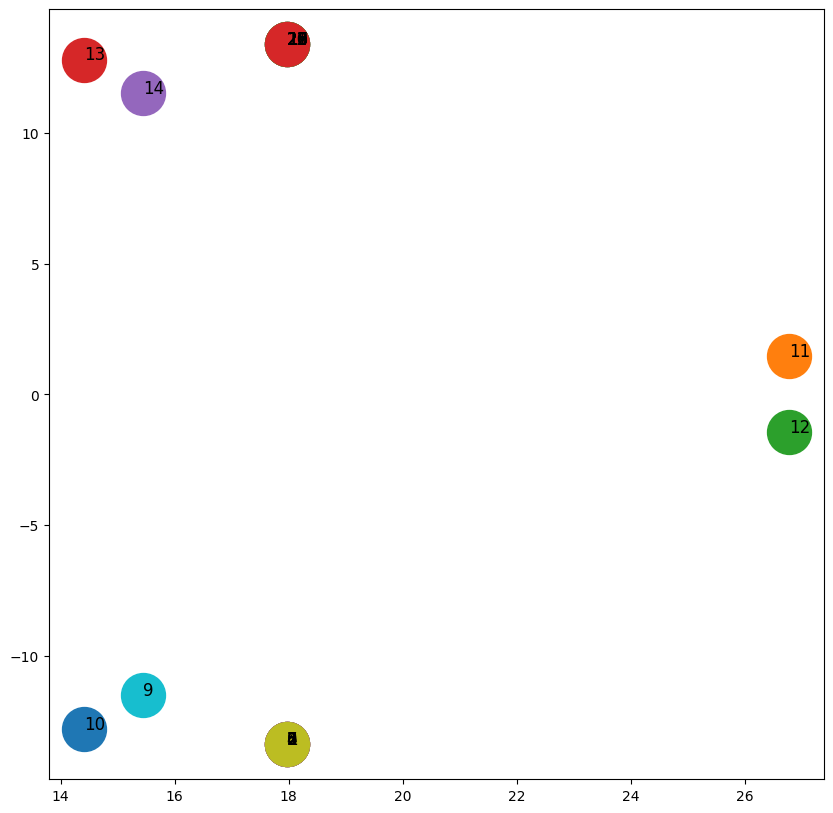

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

ida = 4
idb = 5
for x in G.nodes():
    
    v = gr.get_embedding()[x]
    ax.scatter(v[ida],v[idb], s=1000)
    ax.annotate(str(x), (v[ida],v[idb]), fontsize=12)

## HOPE

SVD error (low rank): 0.052092


array([[-0.07024409, -0.07024348, -0.07024409, -0.07024348],
       [-0.07024409, -0.07024348, -0.07024409, -0.07024348],
       [-0.07024409, -0.07024348, -0.07024409, -0.07024348],
       [-0.07024409, -0.07024348, -0.07024409, -0.07024348],
       [-0.07024409, -0.07024348, -0.07024409, -0.07024348],
       [-0.07024409, -0.07024348, -0.07024409, -0.07024348],
       [-0.07024409, -0.07024348, -0.07024409, -0.07024348],
       [-0.07024409, -0.07024348, -0.07024409, -0.07024348],
       [-0.07024409, -0.07024348, -0.07024409, -0.07024348],
       [-0.07104037, -0.07104201, -0.07104037, -0.07104201],
       [-0.00797181, -0.00799433, -0.00797181, -0.00799433],
       [-0.00079628, -0.00099787, -0.00079628, -0.00099787],
       [ 0.00079628, -0.00099787,  0.00079628, -0.00099787],
       [ 0.00797181, -0.00799433,  0.00797181, -0.00799433],
       [ 0.07104037, -0.07104201,  0.07104037, -0.07104201],
       [ 0.07024409, -0.07024348,  0.07024409, -0.07024348],
       [ 0.07024409, -0.

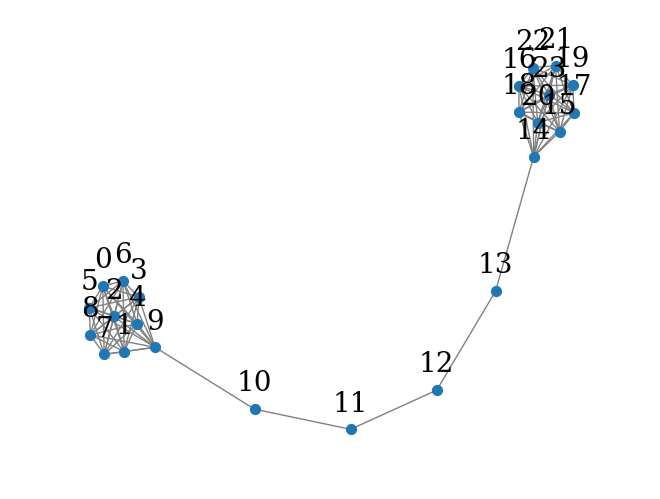

In [10]:
import networkx as nx
from gem.embedding.hope import HOPE

G = nx.barbell_graph(m1=10, m2=4)
draw_graph(G)

hp = HOPE(d=4, beta=0.01)
hp.learn_embedding(G)

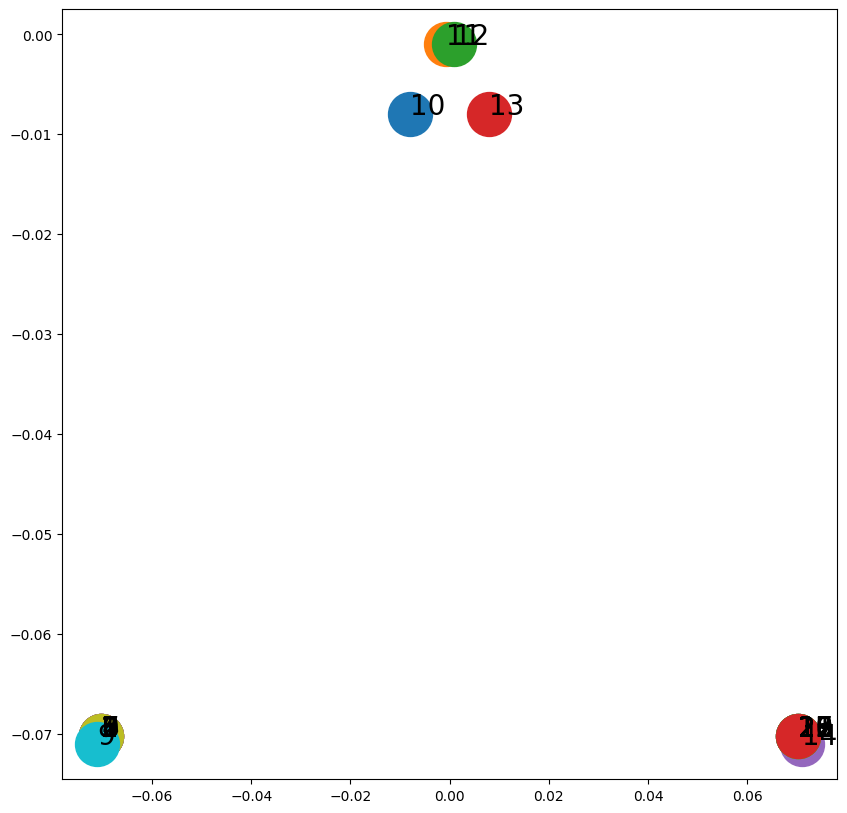

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.nodes():
    
    v = hp.get_embedding()[x,2:]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=20)

## DeepWalk

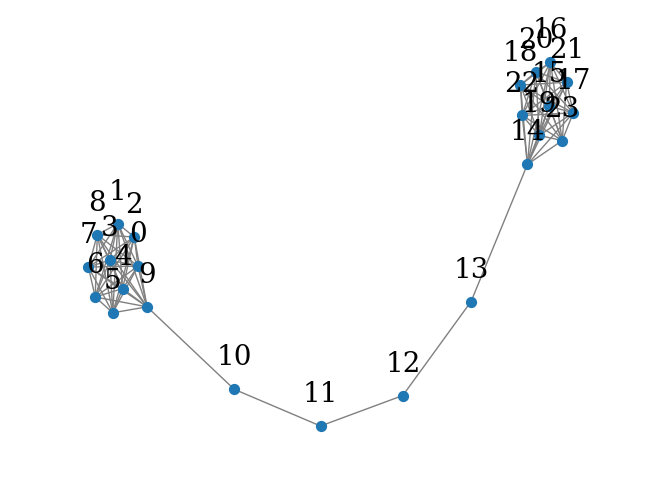

In [12]:
import networkx as nx
from karateclub.node_embedding.neighbourhood.deepwalk import DeepWalk

G = nx.barbell_graph(m1=10, m2=4)
draw_graph(G)

dw = DeepWalk(dimensions=2)
dw.fit(G)

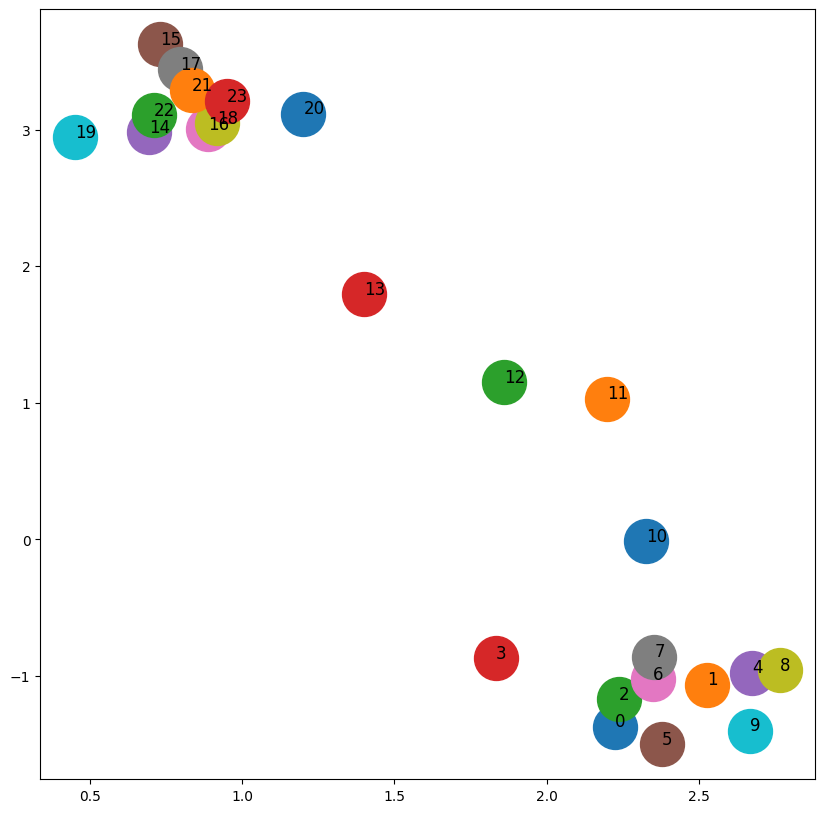

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.nodes():
    
    v = dw.get_embedding()[x]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=12)

## Node2Vec

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 26.41it/s]


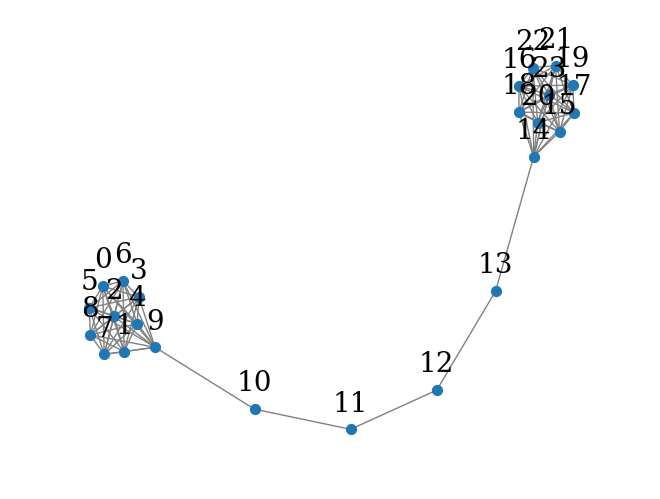

In [14]:
import networkx as nx
from node2vec import Node2Vec

G = nx.barbell_graph(m1=10, m2=4)
draw_graph(G)

node2vec = Node2Vec(G, dimensions=2)
model = node2vec.fit(window=10)
embeddings = model.wv

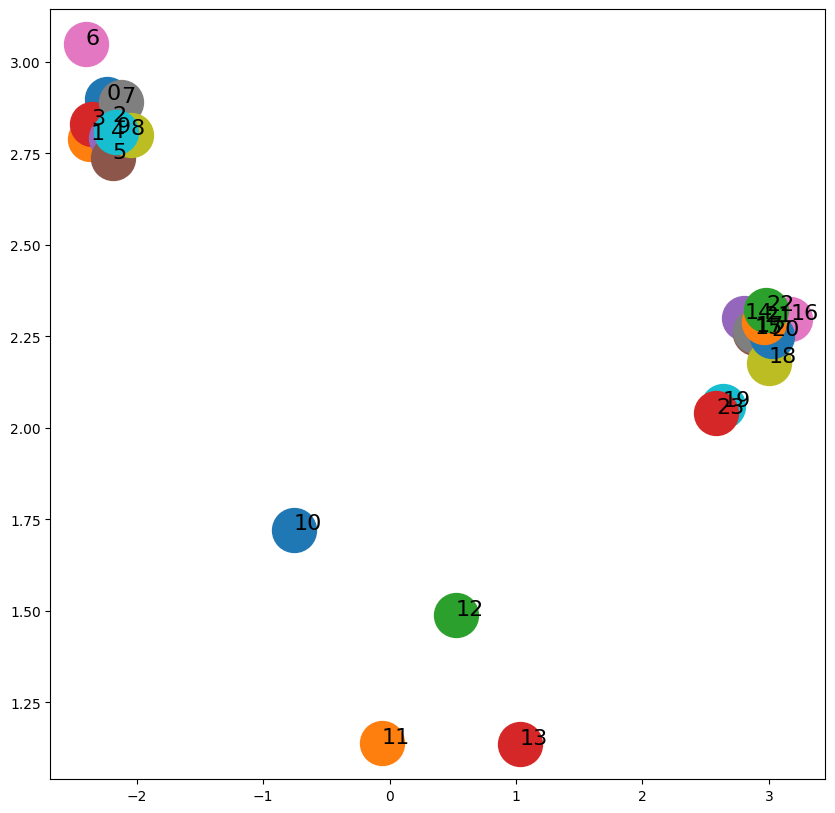

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.nodes():
    
    v = model.wv[str(x)]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=16)

plt.show()

## Edge2Vec

In [16]:
from node2vec.edges import HadamardEmbedder
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)

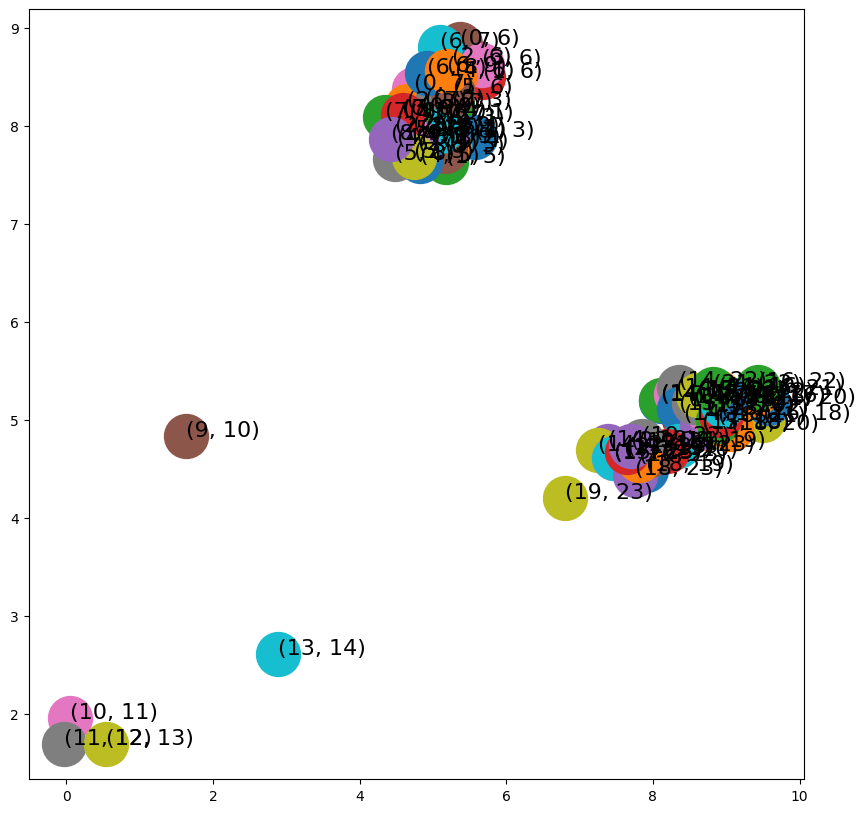

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.edges():
    
    v = edges_embs[(str(x[0]), str(x[1]))]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=16)

plt.show()

## Graph2Vec

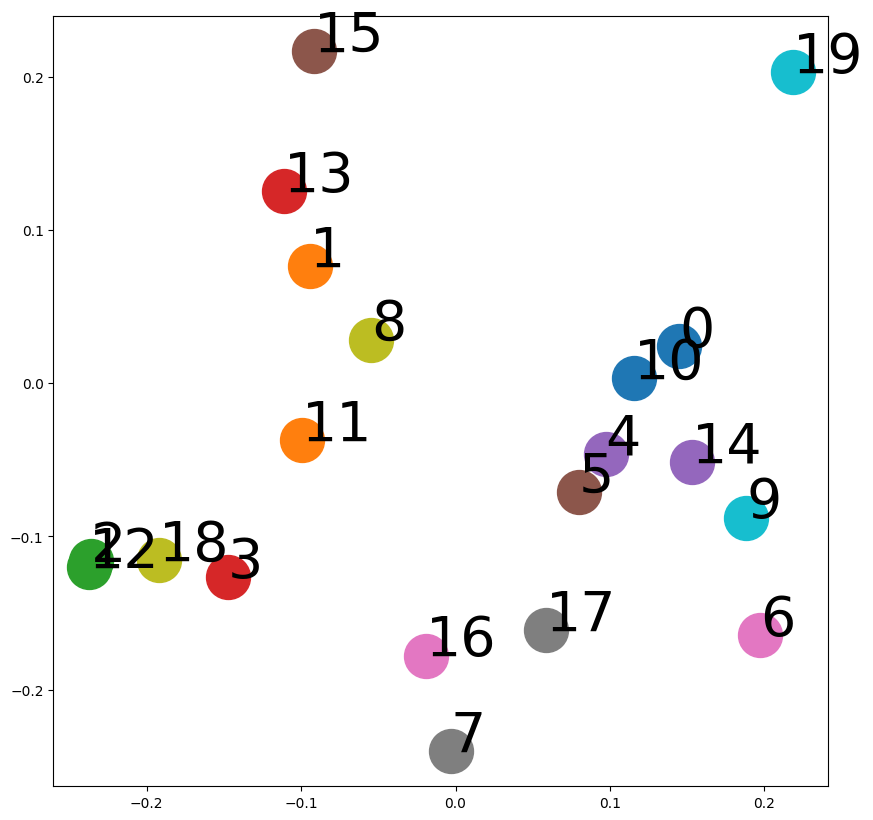

In [18]:
import random
import matplotlib.pyplot as plt
from karateclub import Graph2Vec

n_graphs = 20

def generate_radom():
    n = random.randint(6, 20)
    k = random.randint(5, n)
    p = random.uniform(0, 1)
    return nx.watts_strogatz_graph(n,k,p), [n,k,p]

Gs = [generate_radom() for x in range(n_graphs)]

model = Graph2Vec(dimensions=2, wl_iterations=10)
model.fit([x[0] for x in Gs])
embeddings = model.get_embedding()

fig, ax = plt.subplots(figsize=(10,10))

for i,vec in enumerate(embeddings):
    
    ax.scatter(vec[0],vec[1], s=1000)
    ax.annotate(str(i), (vec[0],vec[1]), fontsize=40)